In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# **1>> Reading and Understandng the data**

In [2]:
df=pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
##Removing columns that are not useful
#1 - instant - It is id column
#2 - dteday - We can remove this as we have month and day of the week column and individual date does not make sense
#3 - casual - cnt is sum of registered and casual
#4 - registered - cnt is sum of registered and casual

col_list=['instant','dteday','casual','registered']
df=df.drop(col_list, axis=1)

In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
#check null counts by column and handle them if nulls are present
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

By looking at above results we can say null values are not present

In [10]:
#check number of unique values in all columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [11]:
#Converting categorical variables with numerical values to categorical type
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace=True)
df.weathersit.replace({1:"clear", 2:"Misty", 3:"light"},inplace=True)
df.mnth.replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"},inplace=True)
#Base on the 2018 Calendar 1/1/2018 was Monday, and based on data set this date corresponds to 6, based on this information 6-> Monday,0->Tuesday,1->Wednesday
#,2->Thursday,3->Friday,4->Saturday,5->Sunday. Using this informace to update dataframe
df.weekday.replace({1:"Wed", 2:"Thu", 3:"Fri", 4:"Sat", 5:"Sun", 6:"Mon", 0:"Tue"},inplace=True)


In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
df2=df.copy()

In [14]:
#Dropping duplicates from the copied data frame
df2.drop_duplicates(inplace=True)

In [15]:
df2.shape

(730, 12)

In [16]:
df.shape

(730, 12)

Above comparision between the shows shape of the original dataframe and copied data frame after removing duplicates is same which implies there are no duplicates

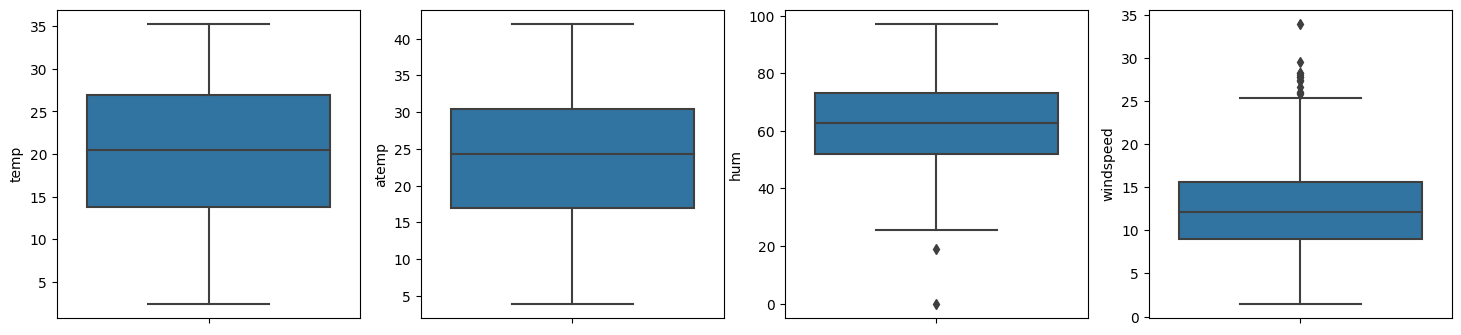

In [17]:
#Drawing box plot to for independent columns with continious variables
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

By looking at the above plots we can say that there is no issue in terms of outliers

# **2>> Exploratory Data Analysis**

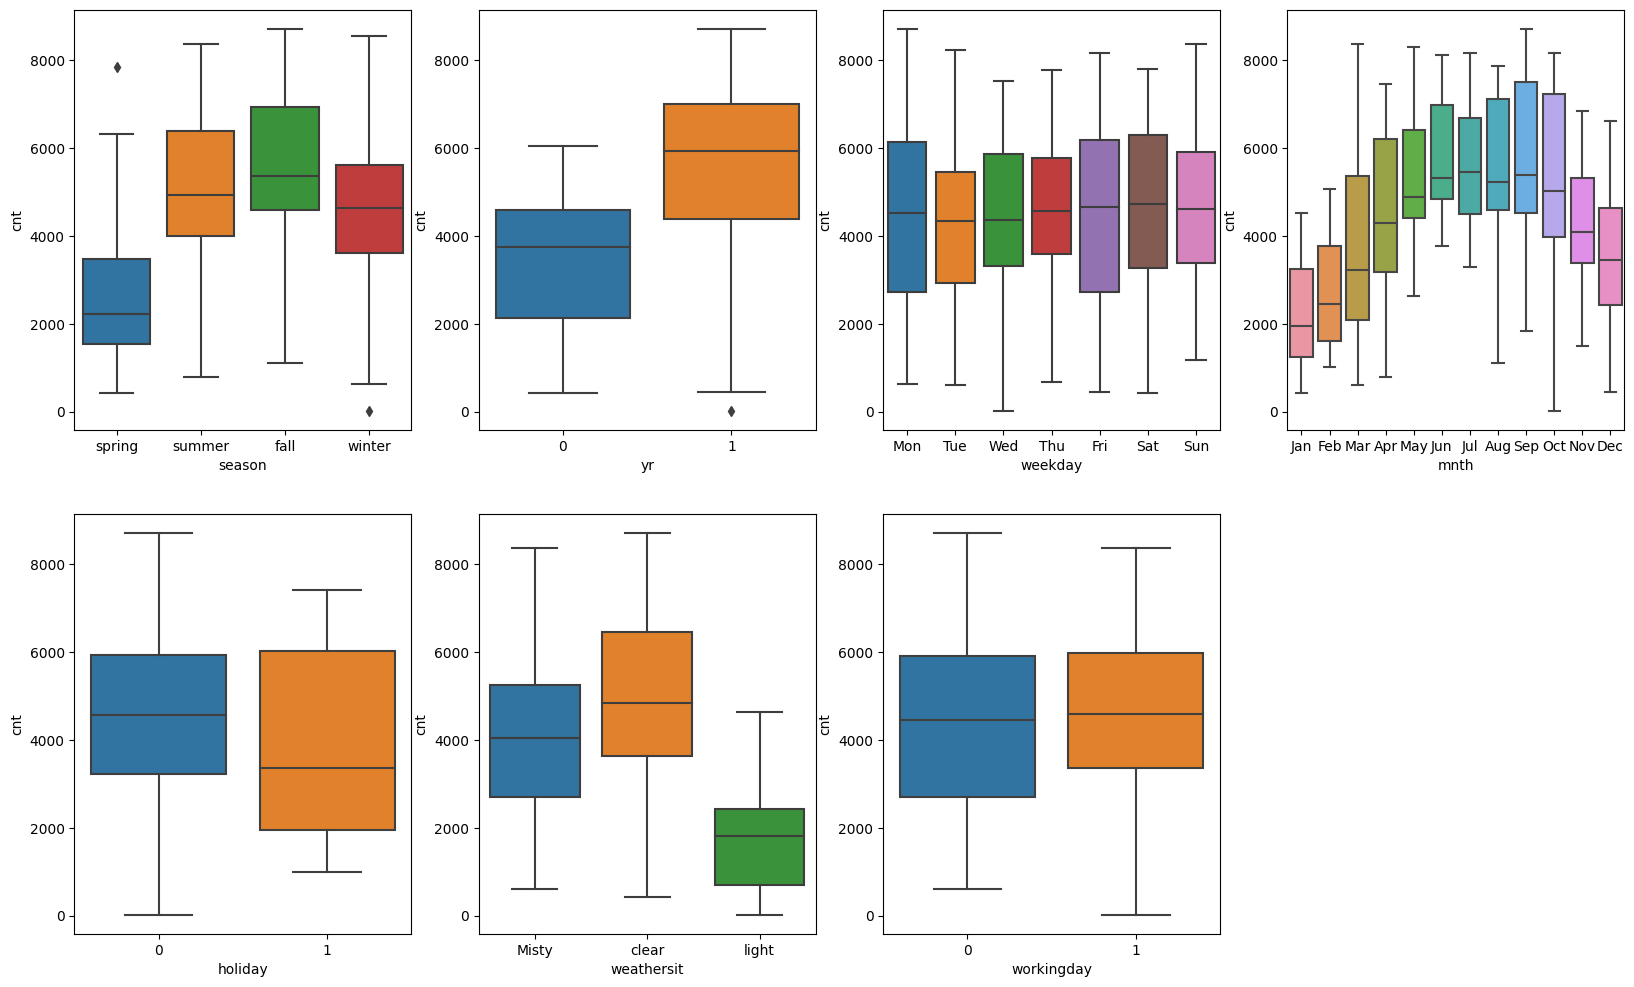

In [18]:
#Creating plots to understand categorical predictor variable relation with the target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

In [19]:
def bar_plot(col):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.barplot(x=col,y='cnt',data=df)
  plt.subplot(1,2,2)
  sns.barplot(x=col,y='cnt',data=df,hue='yr')
  plt.show()


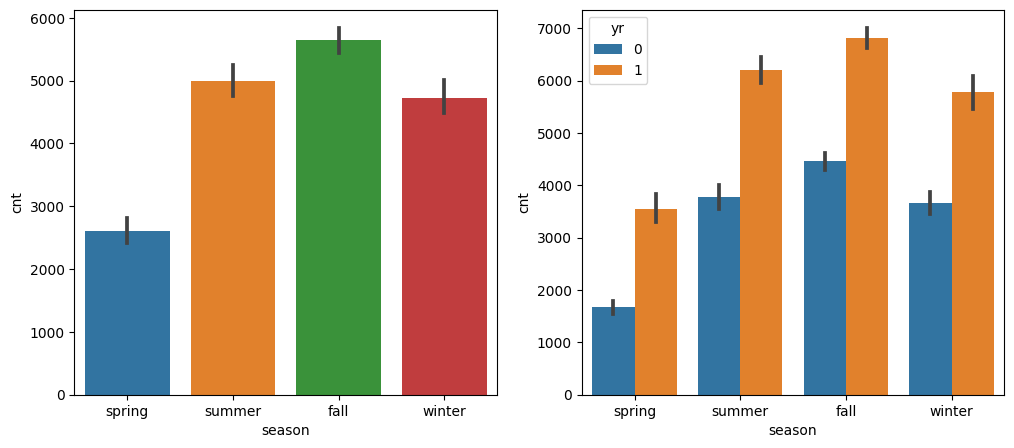

In [20]:
bar_plot('season')

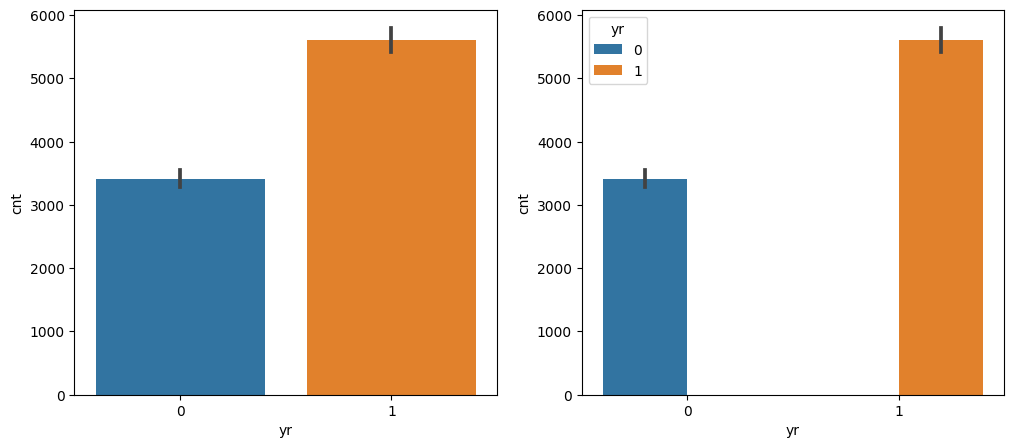

In [21]:
bar_plot('yr')

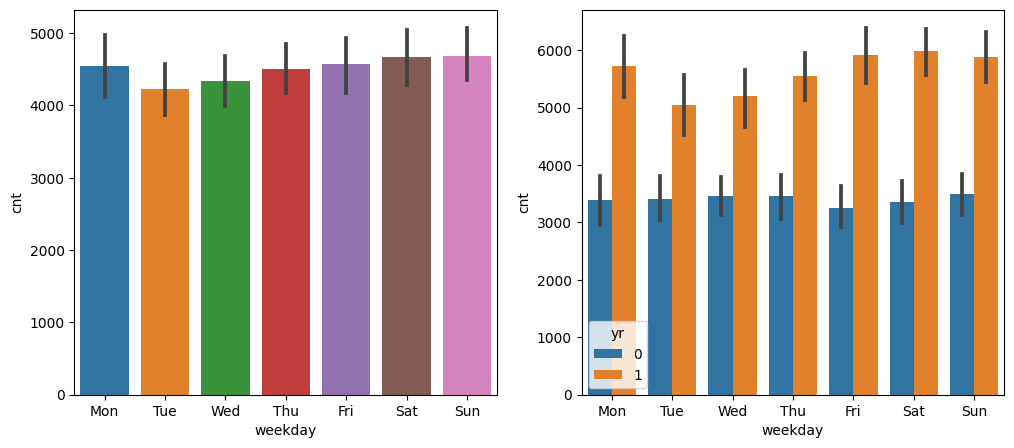

In [22]:
bar_plot('weekday')

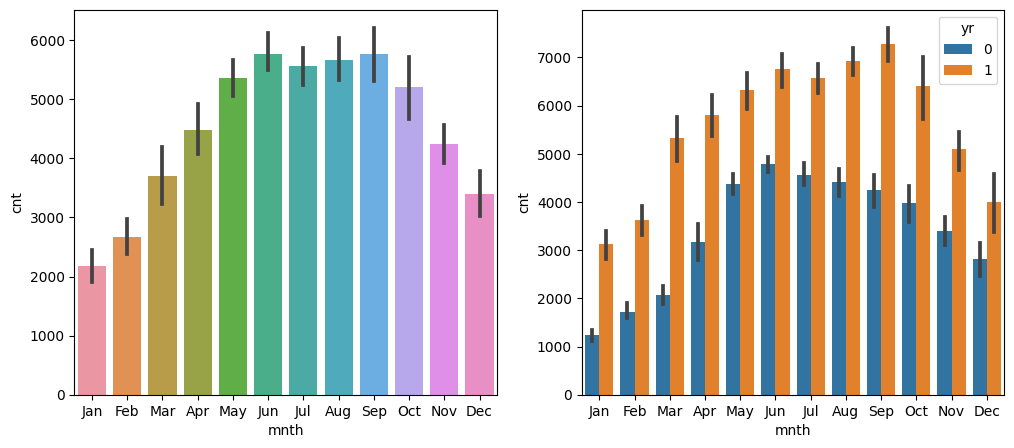

In [23]:
bar_plot('mnth')

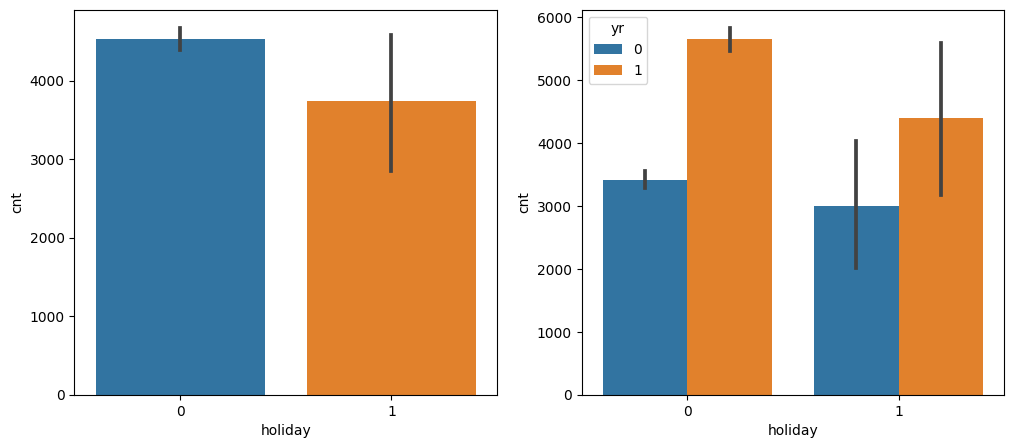

In [24]:
bar_plot('holiday')

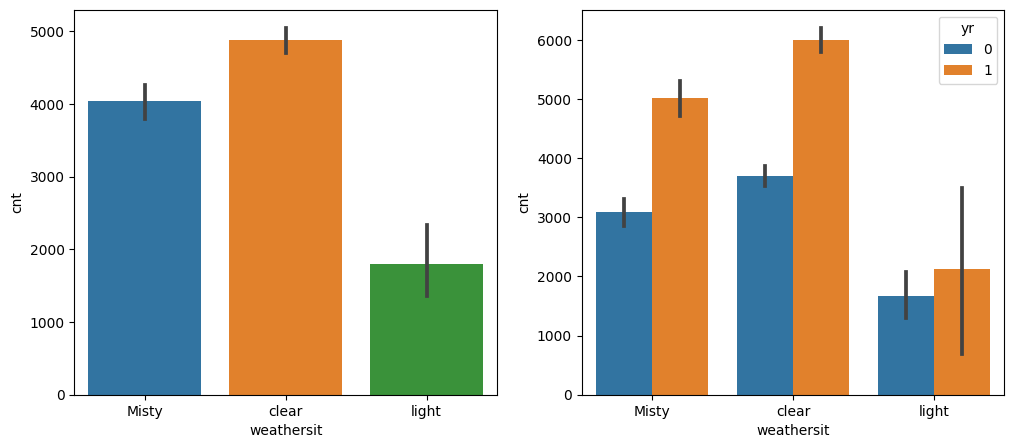

In [25]:
bar_plot('weathersit')

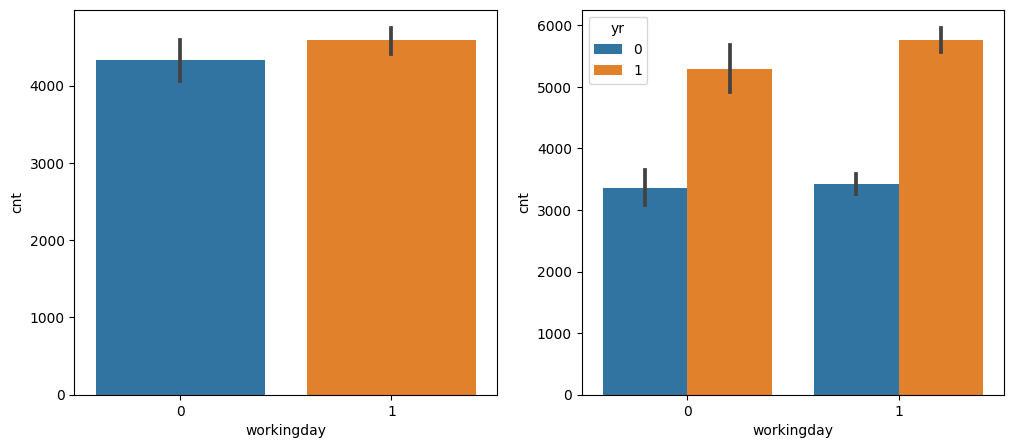

In [26]:
bar_plot('workingday')

**Inference**

1) Year on Year demand has increased

2) Demand is higher when weather situation is (weathersit) is clear

3) Demand seems to be increasing till July, no clear ternd for Aug and Sep (When checked for both years) and decreases from oct to dec

4) Monday seems to be the day with highest demand, overall not much can be said about the relation of week days with demand

5) Demand increases during holiday

6) In terms of season, fall has seen highest demand

7) There is slightly more demand on working days

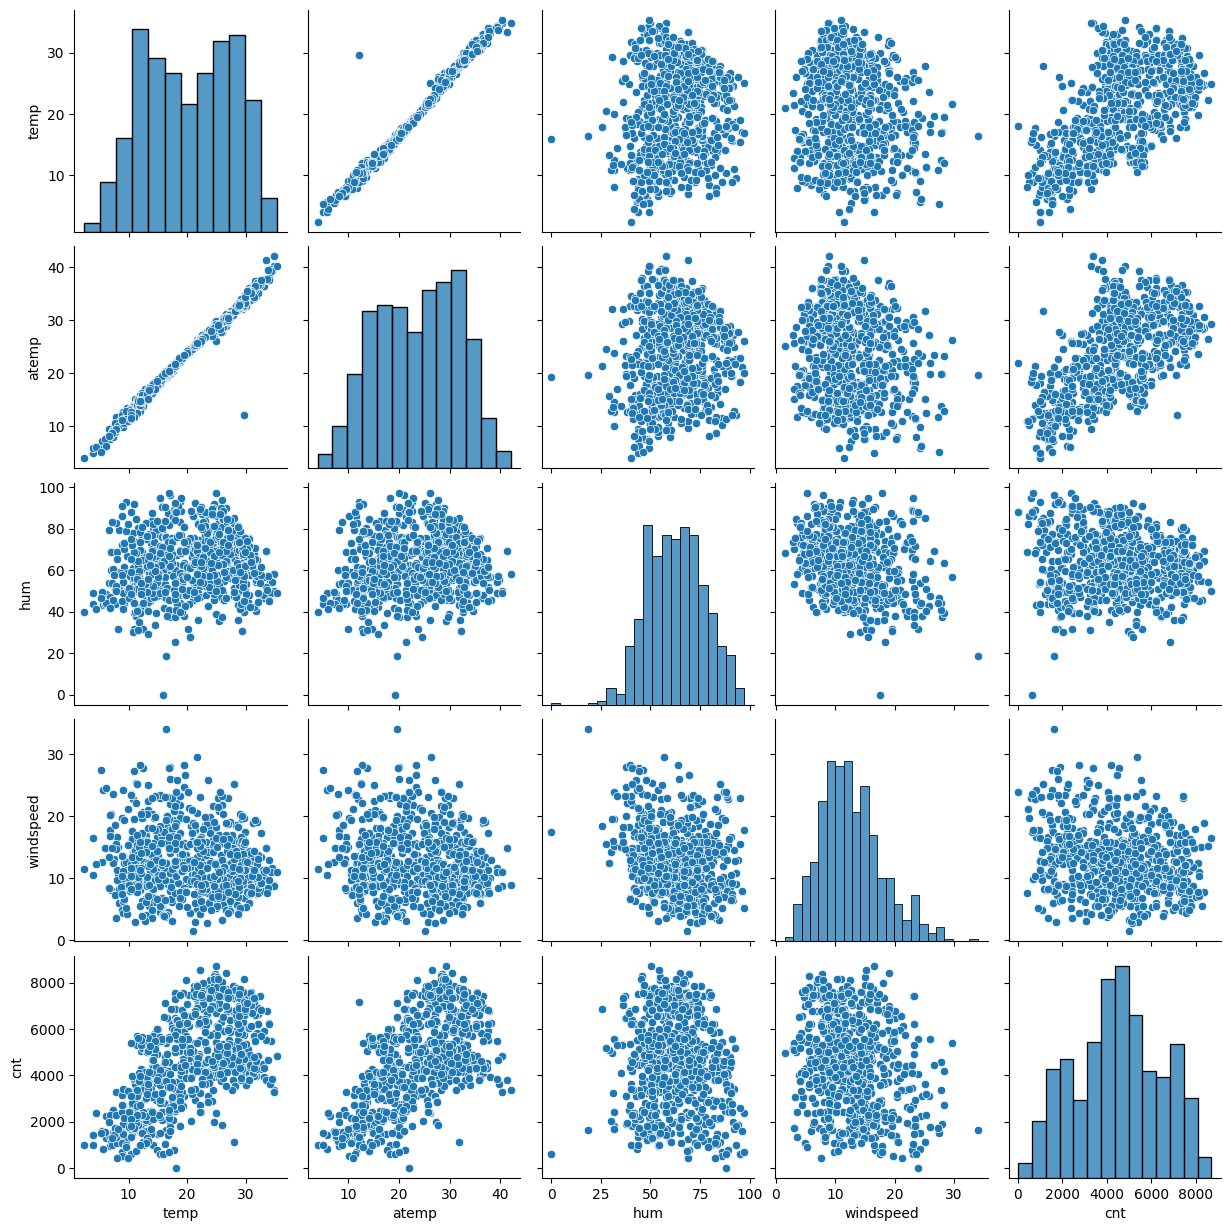

In [27]:
# Creating pairplot for continious variable
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

All the distributions looks nomral

Cnt and temp appears to be positively correlated

Cnt and atemp appears to be positively correlated

Based on the above observations we can apply linear regression for the given dataset

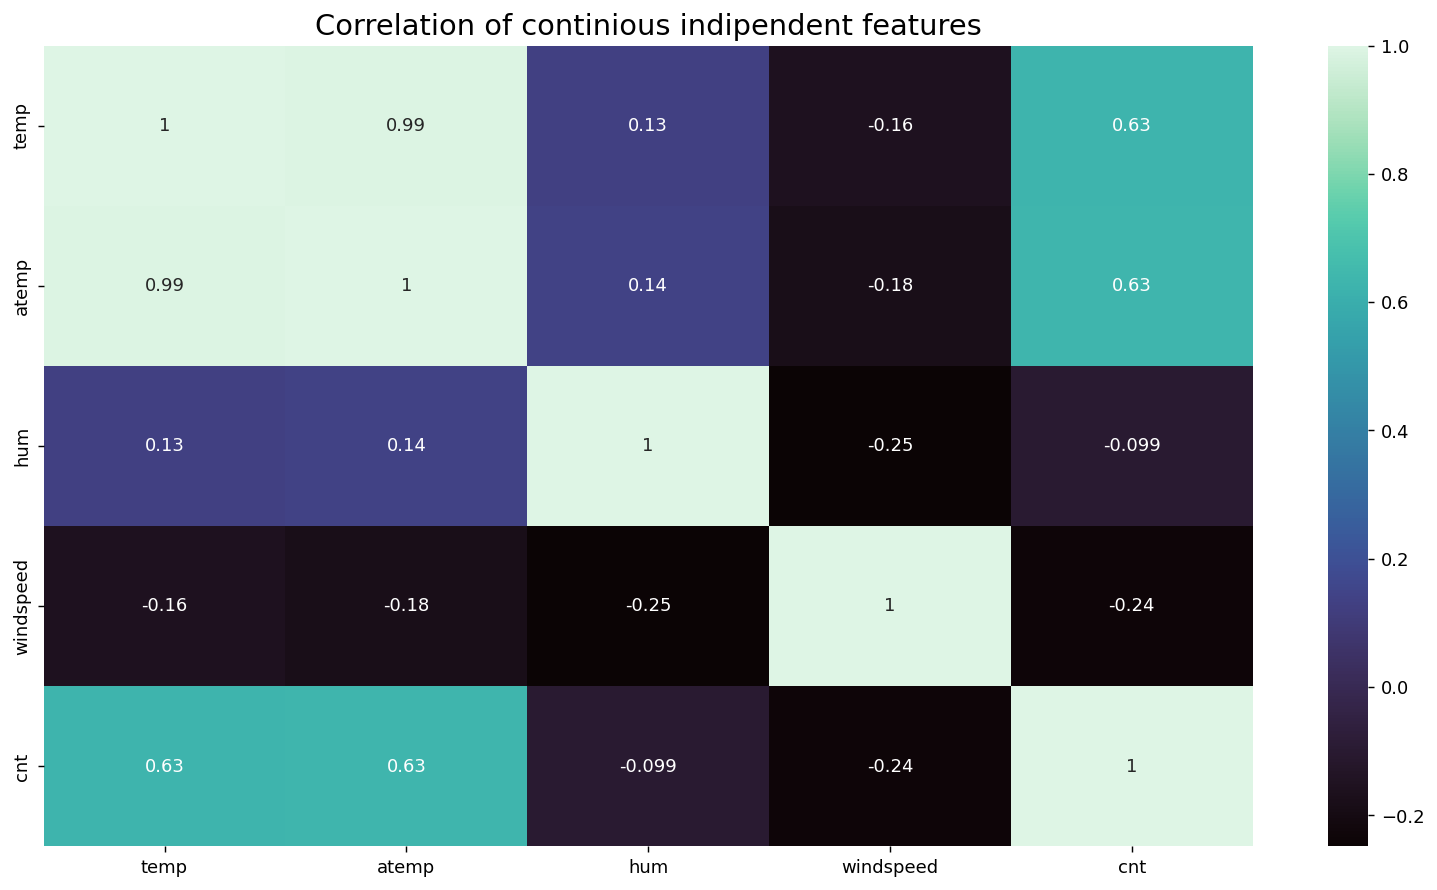

In [28]:
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of continious indipendent features",fontsize=16)
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(),annot= True,cmap="mako")
plt.show()

From the above heatmap we can see temp and atemp are highly correlated

# **3>> Initiating Data Prep**



In [29]:
# Creating dummy variables
#1 of the dummy variable is dropped as fo n categories n-1 dummy variables are needed
df = pd.get_dummies(data=df,columns=['season','mnth','weekday','weathersit'],drop_first=True)


In [30]:
#Print columns after creating dummy columns
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_clear', 'weathersit_light'],
      dtype='object')

In [31]:
df.shape

(730, 30)

In [32]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


# **4>> Initiating Modelling**

In [33]:
# splitting the dataframe into Training and Test data sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [34]:
df_train.shape

(510, 30)

In [35]:
df_test.shape

(220, 30)

In [36]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,1,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,0,0


In [37]:
#Rescaling the features using MinMaxScaler
scaler=MinMaxScaler()
#Applying feature scaling on the continious variables having values othere than binary values i.e. 0,1 values
# Looking at the data these variables are temp,atemp,hum,windspeed,cnt

vars=['temp','atemp','hum','windspeed','cnt']
df_train[vars]=scaler.fit_transform(df_train[vars])

In [38]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,0


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.625490,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.484471,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on above output we can see min for all the columns is 0 and max is 1

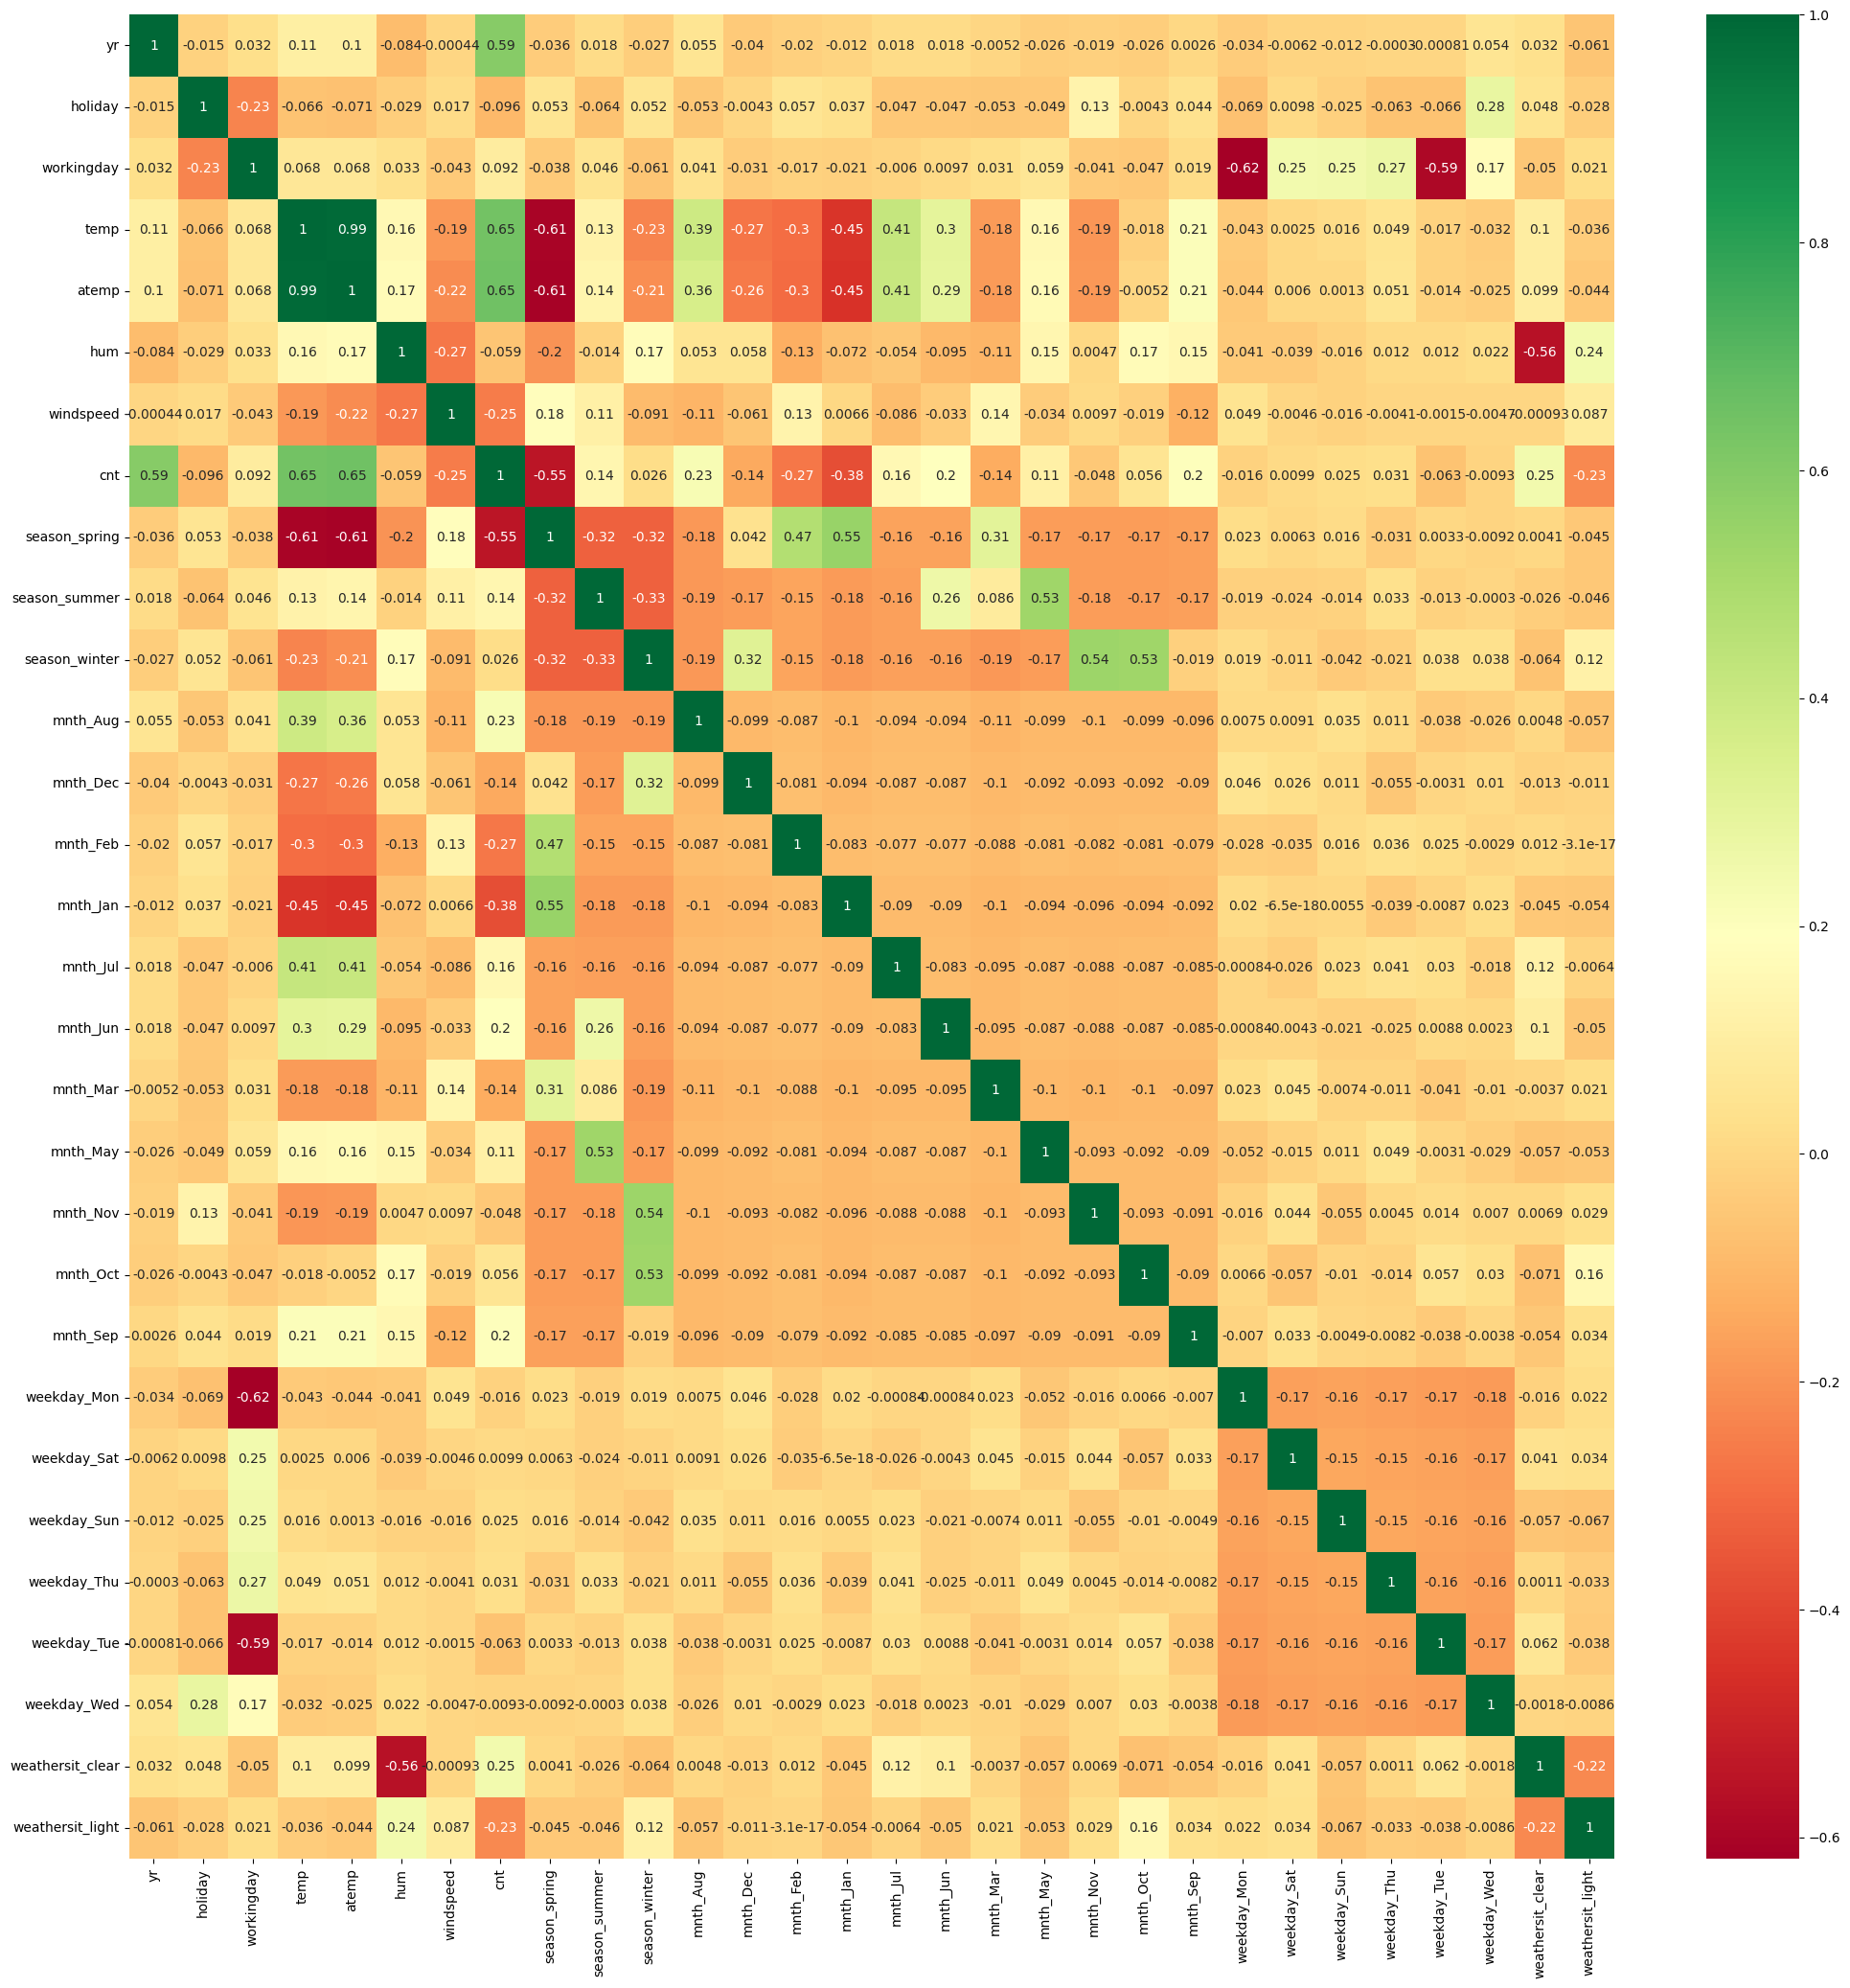

In [40]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
#matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

cnt has good correlation with yr,temp and atemp

In [41]:
# Building the Linear Regression Model with all the variables
y_train = df_train.pop('cnt')
X_train = df_train

Using RFE to create model

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [44]:
#List of 15 top variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 11),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 9),
 ('weathersit_clear', True, 1),
 ('weathersit_light', True, 1)]

In [45]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Mon', 'weathersit_clear',
       'weathersit_light'],
      dtype='object')


In [46]:
# checking rejected columns

X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [48]:
X_train_rfe = X_train[col]

In [49]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [50]:
# LRM - 1

X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.22e-191
Time:                        17:24:08   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1956      0.040  

In [51]:
calculate_vif(X_train_rfe)

,Features,VIF
4,hum,24.61
3,temp,20.45
2,workingday,5.32
6,season_spring,5.05
5,windspeed,4.72
8,season_winter,3.81
13,weathersit_clear,3.45
7,season_summer,2.99
0,yr,2.09
12,weekday_Mon,1.98


In [52]:
#Humidity(hum) shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [53]:
# LMR - 2
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.60e-188
Time:                        17:24:08   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0924      0.032  

In [54]:
calculate_vif(X_train_new)

,Features,VIF
3,temp,7.84
2,workingday,5.19
4,windspeed,4.70
5,season_spring,3.19
12,weathersit_clear,2.84
6,season_summer,2.32
0,yr,2.08
7,season_winter,1.99
11,weekday_Mon,1.96
8,mnth_Jan,1.61


In [55]:
#P Value for holiday seems high, removing the column and recreating the model
X_train_new = X_train_new.drop(['holiday'], axis = 1)
X_train_new.head()

,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Mon,weathersit_clear,weathersit_light
576,1,1,0.815169,0.264686,0,0,0,0,1,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,1,0,0
111,0,1,0.345824,0.380981,0,1,0,0,0,0,0,0,0


In [56]:
# LMR - 3
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.68e-189
Time:                        17:24:08   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0850      0.031  

We can see there is not much difference in R-squared value after removing Humidity,hence we can say the variable was insignificatnt

In [57]:
calculate_vif(X_train_new)

,Features,VIF
2,temp,7.63
3,windspeed,4.69
1,workingday,4.63
4,season_spring,3.12
11,weathersit_clear,2.83
5,season_summer,2.31
0,yr,2.08
6,season_winter,1.93
10,weekday_Mon,1.83
7,mnth_Jan,1.61


mnth_Jan variable seems to be having high P-Value,creating the model after removing that variable

In [58]:
X_train_new = X_train_new.drop(['mnth_Jan'], axis = 1)

In [59]:
# LMR - 4
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          7.12e-189
Time:                        17:24:08   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0676      0.031  

We can see there is not much difference in R-squared value after removing mnth_jan,hence we can say the variable was insignificatnt

In [60]:
calculate_vif(X_train_new)

,Features,VIF
2,temp,7.55
3,windspeed,4.67
1,workingday,4.60
10,weathersit_clear,2.83
4,season_spring,2.48
5,season_summer,2.30
0,yr,2.07
6,season_winter,1.93
9,weekday_Mon,1.82
7,mnth_Jul,1.59


In [61]:
#mnth_Jan variable seems to be having high P-Value,creating the model after removing that variable
X_train_new = X_train_new.drop(['mnth_Jul'], axis = 1)

In [62]:
# LMR - 5
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.42e-188
Time:                        17:24:09   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0602      0.031  

In [63]:
calculate_vif(X_train_new)

,Features,VIF
2,temp,6.47
3,windspeed,4.66
1,workingday,4.60
9,weathersit_clear,2.82
4,season_spring,2.37
0,yr,2.07
5,season_summer,1.96
8,weekday_Mon,1.82
6,season_winter,1.76
7,mnth_Sep,1.22


We can see there is not much difference in R-squared value after removing mnth_jul,hence we can say the variable was insignificatnt

We can see now all the columns seems significant and VIF values also seems to be in acceptable zone

In [64]:
X_train_lm5

,const,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Sep,weekday_Mon,weathersit_clear,weathersit_light
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,1,0,0
111,1.0,0,1,0.345824,0.380981,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,1,0
53,1.0,0,1,0.202618,0.111379,1,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,1,0,0
79,1.0,0,1,0.462664,0.529881,0,1,0,0,0,0,0


# **5>> Residual Analysis**

In [65]:
y_train_count = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

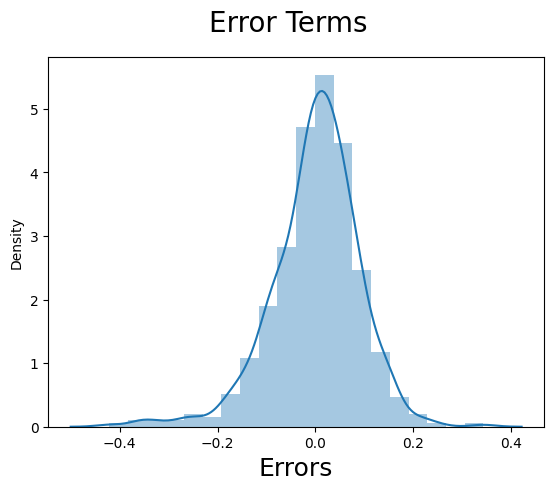

In [66]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

By looking at above chart we can say that error terms follow normal distribution

Residuals have a mean value of zero, i.e., the error terms are normally distributed around zero.

# **6>> Making Predictions & Model Evaluation**

In [67]:
# Applying scaling on the test dataset

vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[vars] = scaler.transform(df_test[vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,1,0


In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
#Creating new data frame from test data frame with only columns that we got from LRM-6
X_test_new = X_test[X_train_new.columns]

In [70]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)

In [71]:
y_pred = lr5.predict(X_test_new)

Text(0, 0.5, 'y_pred')

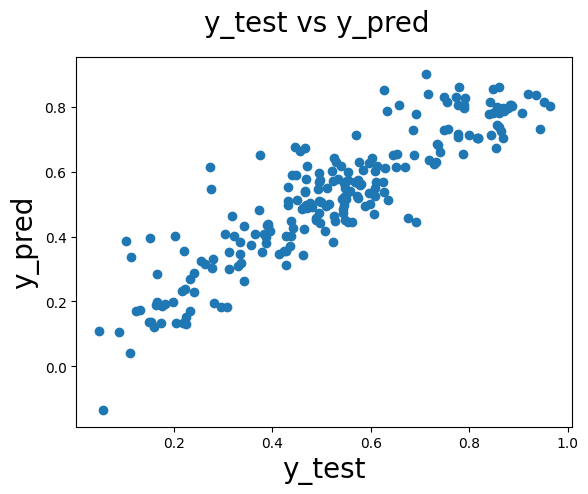

In [72]:
#Ploting y_test against y_pred to understand the spread
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('y_pred',fontsize=20)

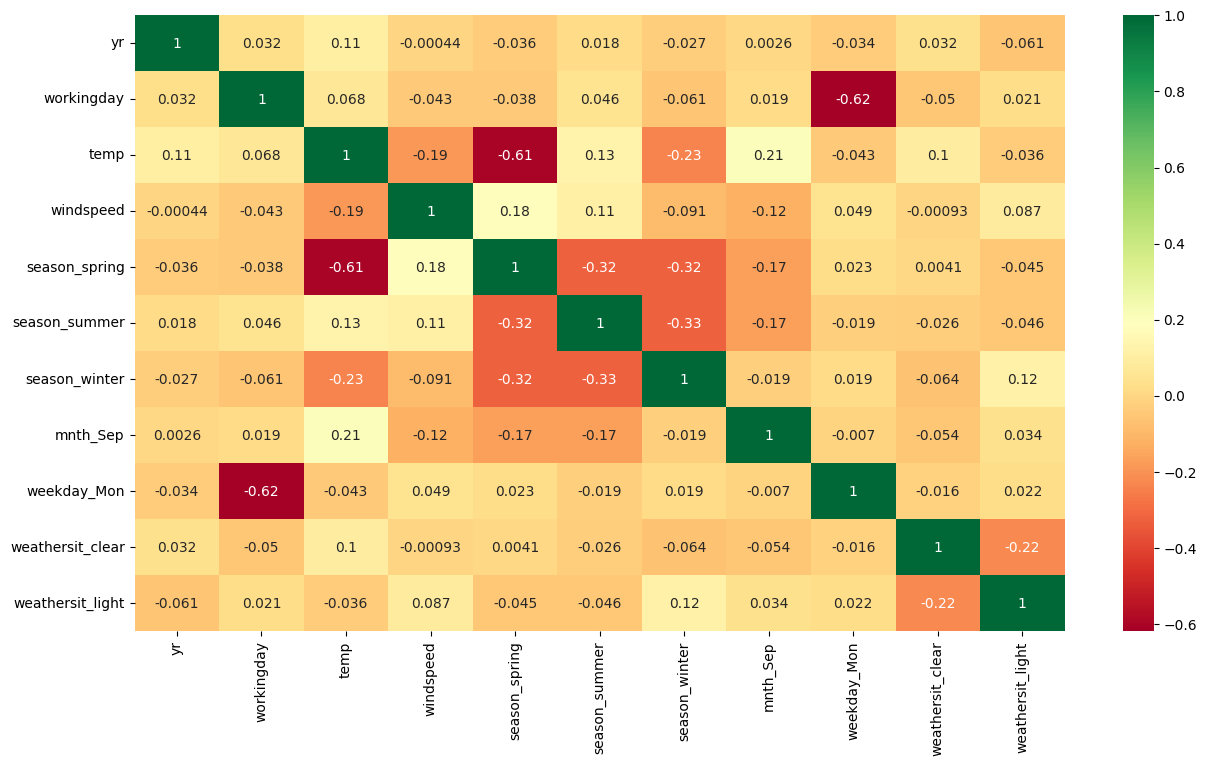

In [73]:
#Checking Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()


no multicolinearity as seen from the heatmap.

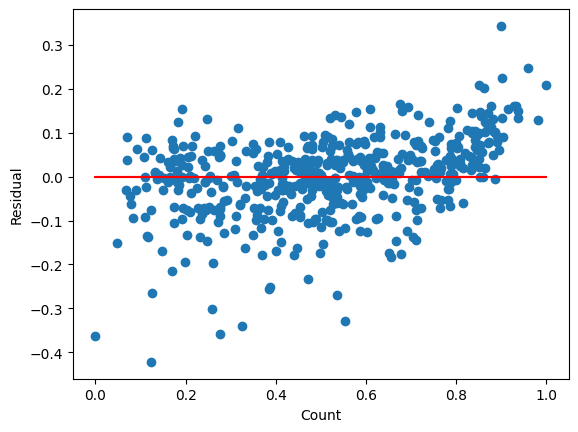

In [74]:
#homoscedasticity
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train - y_train_pred
plt.scatter(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Based on above chart we can say there is no visible pattern for residuals

**Independence of residuals**

The Durbin-Watson statistic will always have a value ranging between 0 and 4. A value of 2.0 indicates there is no autocorrelation detected in the sample.
In our model Durbin-Watson statistic value is 2.083, which signifies there is no autocorrelation.

In [75]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
round(r2,4)

0.8063

In [76]:
round(lr5.params,4)

const               0.0602
yr                  0.2344
workingday          0.0555
temp                0.4796
windspeed          -0.1500
season_spring      -0.0554
season_summer       0.0626
season_winter       0.0958
mnth_Sep            0.0873
weekday_Mon         0.0667
weathersit_clear    0.0804
weathersit_light   -0.2089
dtype: float64

# **Equation is**
 ***cnt=0.0602 + 0.2344 X yr + 0.0555 X workingday + 0.4796 X temp - 0.1500 X windspeed - 0.0554 X season_spring + 0.0626 X season_summer + 0.0958 X season_winter + 0.0873 X mnth_Sep + 0.0667 X weekday_Mon + 0.0804 X weathersit_clear - 0.2089 X weathersit_light***

In [77]:
# Calculating Adjusted-R^2 value for the test dataset
adj_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adj_r2)

0.7768


# **Comparision between Training and Testing dataset:**
- Train dataset R^2          : 0.838
- Test dataset R^2           : 0.834
- Train dataset Adjusted R^2 : 0.8063
- Test dataset Adjusted R^2  : 0.7768

Demand of bikes can be explained by
yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Sep,weekday_Mon ,weathersit_clear,weathersit_light